In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.encoders import LabelEncoder

In [21]:
# exercise 1
insurance_pd = pd.read_csv("https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/insurance.csv ")
print("5 first data\n",insurance_pd.head())
print("5 least data\n",insurance_pd.tail())


5 first data
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5 least data
       age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [22]:
# data describe
insurance_pd.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
# data info
insurance_pd.info()

# conclusion
# from describe and info we can see that the data is clean and there is no missing value
# from the describe we can see that the data is not normalized, so we need to normalize the data
# from the info we can see that the data type is already correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
# encoding the features
label_encoder = LabelEncoder()
for column in insurance_pd.columns:
    if insurance_pd[column].dtype == 'object':
        insurance_pd[column] = label_encoder.fit_transform(insurance_pd[column])

# normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
insurance_pd_normalized = pd.DataFrame(scaler.fit_transform(insurance_pd), columns=insurance_pd.columns)

In [51]:
# encoded data
print("5 first data\n",insurance_pd.head())
print("5 least data\n",insurance_pd.tail())

insurance_pd_normalized.describe()

5 first data
    age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520
5 least data
       age  sex    bmi  children  smoker  region     charges
1333   50    1  30.97         3       0       1  10600.5483
1334   18    0  31.92         0       0       0   2205.9808
1335   18    0  36.85         0       0       2   1629.8335
1336   21    0  25.80         0       0       3   2007.9450
1337   61    0  29.07         0       1       1  29141.3603


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.505232,0.395572,0.218984,0.204783,0.505232,0.193916
std,0.305434,0.500160,0.164062,0.241099,0.403694,0.368295,0.193301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.278080,0.000000,0.000000,0.333333,0.057757
50%,0.456522,1.000000,0.388485,0.200000,0.000000,0.666667,0.131849
75%,0.717391,1.000000,0.504002,0.400000,0.000000,0.666667,0.247700
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


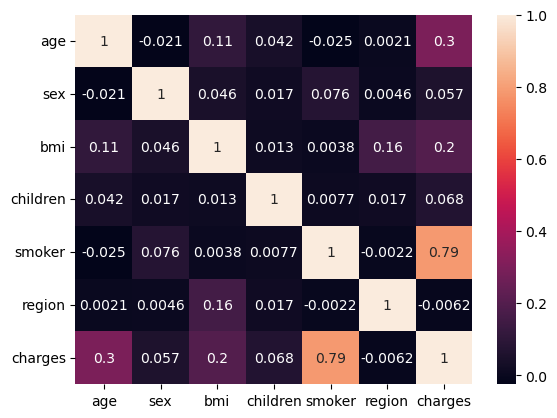

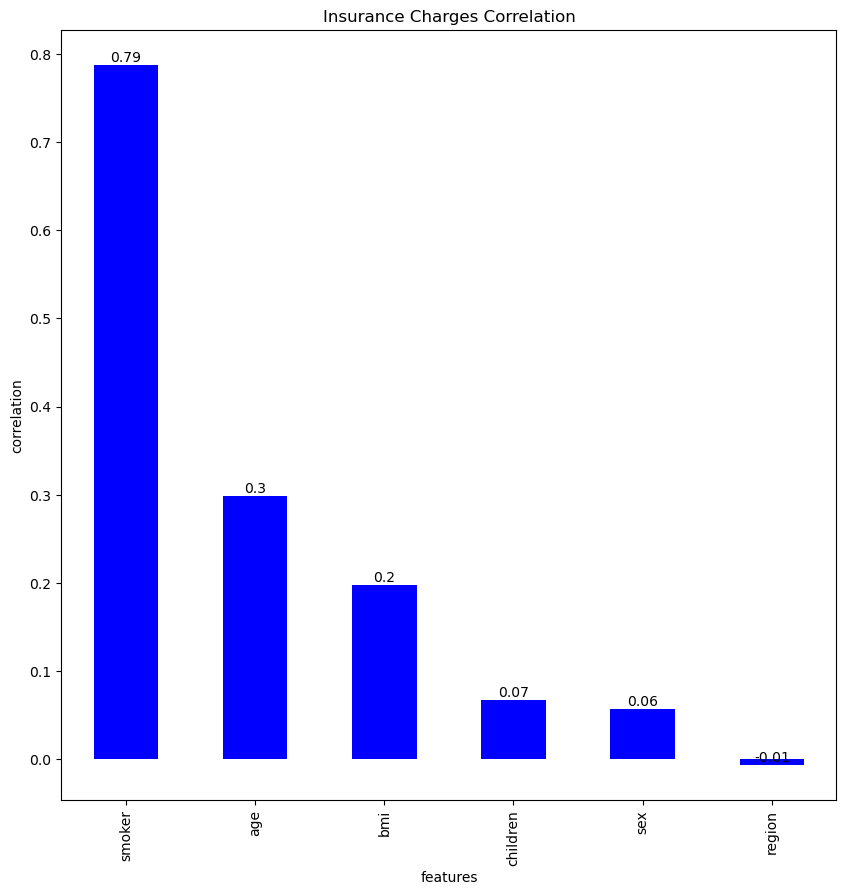

In [50]:
# create a correlation matrix
insurance_corr = insurance_pd.corr()["charges"]
insurance_corr.drop("charges", inplace=True)

# create heatmap of the correlation matrix
sns.heatmap(insurance_pd.corr(), annot=True)

# plot insurance charge correlation
plt.figure(figsize=(10, 10))
plt.title("Insurance Charges Correlation")
insurance_corr.sort_values(ascending=False).plot(
    kind='bar', 
    x='features', 
    y='correlation', 
    ylabel='correlation', 
    xlabel='features', 
    color='blue')
# Show value on top of the bar
for i, v in enumerate(insurance_corr.sort_values(ascending=False)):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()


In [ ]:
# conclusion
# from the correlation matrix we can see that the age, bmi, and smoker have a high correlation with the charges

In [41]:
# cleansing only correlated data
insurance_correlated = insurance_pd_normalized[['age', 'bmi', 'smoker', 'charges']]
# split between features and target
insurance_target = insurance_correlated['charges']
insurance_features= insurance_correlated.drop(columns=['charges'])

In [47]:
# plit train and target data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(insurance_features, insurance_target, test_size=0.2, random_state=100)

In [48]:
# creating linear regression model 
from sklearn.linear_model import LinearRegression   
insurance_lr_model = LinearRegression().fit(X_train, y_train)

In [49]:
# testing the model
from sklearn.metrics import mean_squared_error
insurance_lr_predictions = insurance_lr_model.predict(X_test)
insurance_lr_mse = mean_squared_error(y_test, insurance_lr_predictions)
insurance_lr_rmse = np.sqrt(insurance_lr_mse)
print("Linear Regression RMSE: ", insurance_lr_rmse)
# print score
print("Linear Regression Score: ", insurance_lr_model.score(X_test, y_test))

Linear Regression RMSE:  0.09123501359698573
Linear Regression Score:  0.7916580391198964
